In [38]:
import keras
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [31]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)
# 6000 image samples

60000

In [6]:
X_train[0].shape
# 28 x 28 pixel image

(28, 28)

In [7]:
X_train[0]
# 255 means white while 0 means black

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

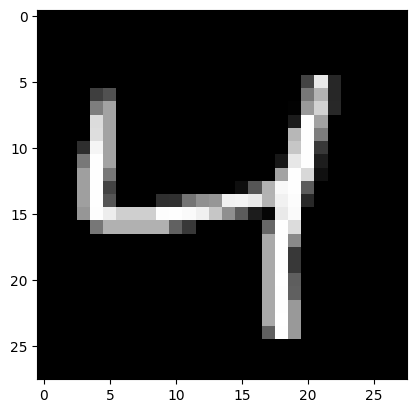

In [12]:
plt.imshow(X_train[2],cmap="gray")

In [14]:
print(y_train[2])

4


In [15]:
X_train.shape

(60000, 28, 28)

In [20]:
# we will flatten this matrix i.e convert this 28x28 array into single dimensional array to make input layer of our neural network
X_train_flatten = X_train.reshape(len(X_train),-1)
X_test_flatten = X_test.reshape(len(X_test),-1)

In [21]:
X_train_flatten.shape

(60000, 784)

In [22]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# output shape is 10 i.e 0 to 9 , very simple neural network 1 layer

In [25]:
X_train_flatten = X_train_flatten/255
X_test_flatten = X_test_flatten/255

# scaling the data

In [29]:
model.fit(X_train_flatten,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 475us/step - loss: 0.2197 - accuracy: 0.9388
Epoch 2/15
1875/1875 [==============================] - 1s 346us/step - loss: 0.2200 - accuracy: 0.9387
Epoch 3/15
1875/1875 [==============================] - 1s 346us/step - loss: 0.2198 - accuracy: 0.9385
Epoch 4/15
1875/1875 [==============================] - 1s 350us/step - loss: 0.2197 - accuracy: 0.9391
Epoch 5/15
1875/1875 [==============================] - 1s 352us/step - loss: 0.2191 - accuracy: 0.9394
Epoch 6/15
1875/1875 [==============================] - 1s 352us/step - loss: 0.2198 - accuracy: 0.9384
Epoch 7/15
1875/1875 [==============================] - 1s 371us/step - loss: 0.2193 - accuracy: 0.9385
Epoch 8/15
1875/1875 [==============================] - 1s 344us/step - loss: 0.2193 - accuracy: 0.9394
Epoch 9/15
1875/1875 [==============================] - 1s 373us/step - loss: 0.2196 - accuracy: 0.9386
Epoch 10/15
1875/1875 [==============================] - 1s 460u

In [32]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 314us/step - loss: 0.3099 - accuracy: 0.9251


[0.3099144697189331, 0.9251000285148621]

In [35]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 278us/step


array([7.7717893e-12, 6.5255434e-16, 1.3693106e-09, 8.9051872e-01,
       6.0030528e-05, 2.2236310e-02, 1.6808319e-19, 9.9982017e-01,
       1.0379269e-02, 3.3023831e-01], dtype=float32)

In [39]:
# building confusion  matrix
y_predicted_labels = [np.argmax(val) for val in y_predicted]
# y_predicted was array we took index of maximum value and that we will compare with y_test

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

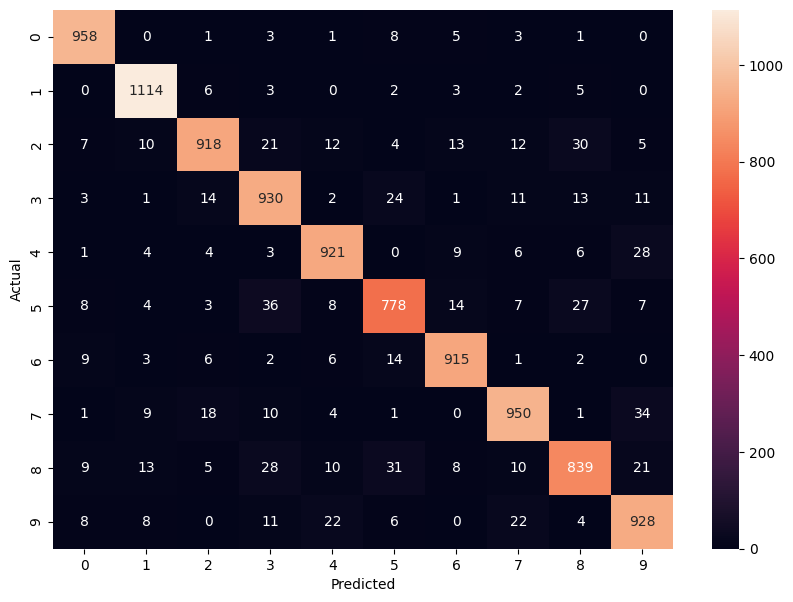

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
# adding hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    ])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_flatten,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 594us/step - loss: 0.2725 - accuracy: 0.9230
Epoch 2/15
1875/1875 [==============================] - 1s 557us/step - loss: 0.1244 - accuracy: 0.9635
Epoch 3/15
1875/1875 [==============================] - 1s 571us/step - loss: 0.0868 - accuracy: 0.9736
Epoch 4/15
1875/1875 [==============================] - 1s 567us/step - loss: 0.0662 - accuracy: 0.9804
Epoch 5/15
1875/1875 [==============================] - 1s 551us/step - loss: 0.0519 - accuracy: 0.9840
Epoch 6/15
1875/1875 [==============================] - 1s 554us/step - loss: 0.0411 - accuracy: 0.9873
Epoch 7/15
1875/1875 [==============================] - 1s 549us/step - loss: 0.0346 - accuracy: 0.9891
Epoch 8/15
1875/1875 [==============================] - 1s 545us/step - loss: 0.0282 - accuracy: 0.9909
Epoch 9/15
1875/1875 [==============================] - 1s 561us/step - loss: 0.0230 - accuracy: 0.9930
Epoch 10/15
1875/1875 [==============================] - 1s 676u

313/313 [==============================] - 0s 502us/step


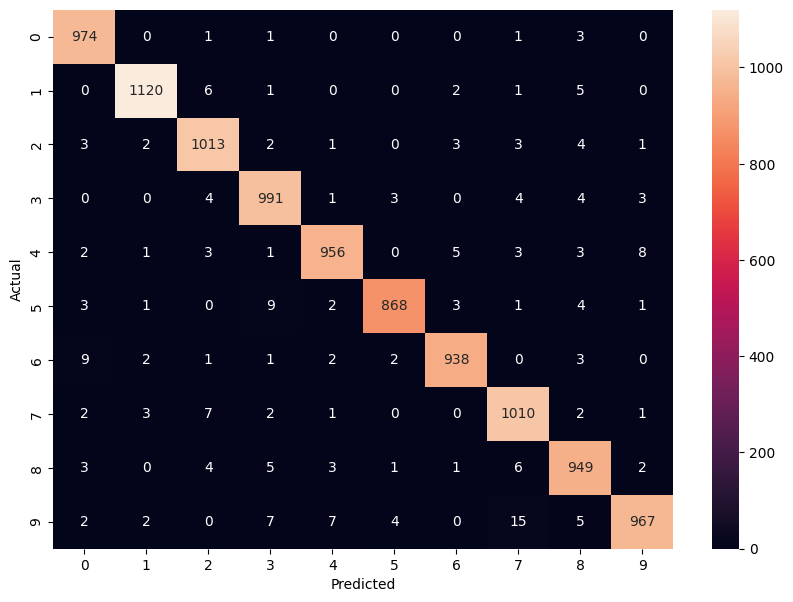

In [51]:
y_predicted = model.predict(X_test_flatten)
# building confusion  matrix
y_predicted_labels = [np.argmax(val) for val in y_predicted]
# y_predicted was array we took index of maximum value and that we will compare with y_test

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Activation Functions

In output layer of lets say above exapmple if we hadnt had the sigmoid activation function then our model won't predict value between 0 and 1, which we would find difficult to classify as method of classification

#### Actvation in hidden layers

In any hidden layers , their are two components , one is weighted sum of input , second one is activation function
y = w1x1+y2x2+......    input
z = 1/(1+e^(y))          activation

Using non linear activation is important otherwise all layers will output the same

For hidden layers, ReLu is the most used activation function since it involves very less computation